<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/pytorch/t81_558_class_03_2_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 3: Introduction to PyTorch**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 3 Material

* Part 3.1: Deep Learning and Neural Network Introduction [[Video]](https://www.youtube.com/watch?v=zYnI4iWRmpc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_1_neural_net.ipynb)
* **Part 3.2: Introduction to Tensorflow and PyTorch** [[Video]](https://www.youtube.com/watch?v=PsE73jk55cE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_2_pytorch.ipynb)
* Part 3.3: Saving and Loading a PyTorch Neural Network [[Video]](https://www.youtube.com/watch?v=-9QfbGM1qGw&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_3_save_load.ipynb)
* Part 3.4: Early Stopping in PyTorch to Prevent Overfitting [[Video]](https://www.youtube.com/watch?v=m1LNunuI2fk&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_4_early_stop.ipynb)
* Part 3.5: Extracting Weights and Manual Calculation [[Video]](https://www.youtube.com/watch?v=7PWgx16kH8s&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_03_5_weights.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running and maps Google Drive if needed.

In [1]:
try:
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


# Part 3.2: Introduction to PyTorch

PyTorch [[Cite:paszke2019pytorch]](https://arxiv.org/abs/1912.01703) is an open-source software library for machine learning in various kinds of perceptual and language understanding tasks. It is currently used for research and production by different teams at [Meta Platforms](https://about.facebook.com/). Companies have built several pieces of deep learning software on top of PyTorch, including Tesla Autopilot, Uber's Pyro, Hugging Face's Transformers, PyTorch Lightning, and Catalyst. PyTorch provides two high-level features: NumPy-like tensor computing and deep neural networks.

* [PyTorch Homepage](https://pytorch.org/)
* [PyTorch GitHib](https://github.com/pytorch/pytorch)
* [PyTorch Forums](https://discuss.pytorch.org/)

## Why PyTorch

* Supported by Meta
* Works well on Windows, Linux, and Mac
* Excellent GPU support
* Python is an easy to learn programming language
* Python is extremely popular in the data science community

## Deep Learning Tools
PyTorch is not the only game in town. The biggest competitor to PyTorch is TensorFlow/Keras. Listed below are some of the deep learning toolkits actively being supported:

* **[TensorFlow](https://www.tensorflow.org/)** - Google's deep learning API.  The focus of this class, along with Keras.
* **[Keras](https://keras.io/)** - Acts as a higher-level to Tensorflow.
* **[PyTorch](https://pytorch.org/)** - PyTorch is an open-source machine learning library based on the Torch library, used for computer vision and natural language applications processing. Facebook's AI Research lab primarily develops PyTorch. 

Other deep learning tools:

* **[Deeplearning4J](http://deeplearning4j.org/)** - Java-based. Supports all major platforms. GPU support in Java!
* **[H2O](http://www.h2o.ai/)** - Java-based.  

In my opinion, the two primary Python libraries for deep learning are PyTorch and Keras. Generally, PyTorch requires more lines of code to perform the deep learning applications presented in this course. This trait of PyTorch gives Keras an easier learning curve than PyTorch. However, if you are creating entirely new neural network structures in a research setting, PyTorch can make for easier access to some of the low-level internals of deep learning.

## Using PyTorch Directly

PyTorch is also a low-level mathematics API, similar to [NumPy](http://www.numpy.org/). However, unlike Numpy, PyTorch is built for deep learning. PyTorch compiles these compute graphs into highly efficient C++/[CUDA](https://en.wikipedia.org/wiki/CUDA) code.

## PyTorch Linear Algebra Examples

PyTorch is a library for linear algebra, other components of PyTorch are a higher-level abstraction for neural networks that you build upon the lower level linear algebra. In this section, I will demonstrate some basic linear algebra that directly employs PyTorch and does not implement a neural network. First, we will see how to multiply a row and column matrix.

In [2]:
import torch

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = torch.Tensor([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = torch.Tensor([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = torch.mm(matrix1, matrix2)

print(product)
print(float(product))

tensor([[12.]])
12.0


This example multiplied two PyTorch tensors.  Next, we will see how to subtract a constant from a variable.

In [3]:
import torch

x = torch.Tensor([1.0, 2.0])
a = torch.Tensor([3.0, 3.0])

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = torch.subtract(x, a)
print(sub)
print(sub.numpy())
# ==> [-2. -1.]

tensor([-2., -1.])
[-2. -1.]


Of course, variables are only useful if their values can be changed.  The program can accomplish this change in value by calling the assign function.

In [4]:
x[0] = 4.0
x[1] = 6.0

The program can now perform the subtraction with this new value.

In [5]:
sub = torch.subtract(x, a)
print(sub)
print(sub.numpy())

tensor([1., 3.])
[1. 3.]


In the next section, we will see a PyTorch example that has nothing to do with neural networks.

## PyTorch Mandelbrot Set Example

Next, we examine another example where we use PyTorch directly. To demonstrate that PyTorch is mathematical and does not only provide neural networks, we will also first use it for a non-machine learning rendering task. The code presented here can render a [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set). 

In [6]:
import torch
import numpy as np

import PIL.Image
from io import BytesIO
from IPython.display import Image, display

# Take a NumPy array and render it as a Mandlebrot.
def render(a):
  a_cyclic = (a*0.3).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  return PIL.Image.fromarray(a)

# Loop through the render cycles for. Mandlebrot plot.
def mandelbrot_helper(grid_c, current_values, counts,cycles):
  for i in range(cycles):
    # The Mandlebrot formula
    temp = current_values*current_values + grid_c
    not_diverged = torch.abs(temp) < 4
    current_values.copy_(temp)
    counts.copy_(torch.add(counts,not_diverged.double()))

# Render a Mandlebrot plot at the specified location, zoom, and render cycles.
def mandelbrot(render_size,center,zoom,cycles):
  f = zoom/render_size[0]

  real_start = center[1]-(render_size[1]/2)*f
  real_end = real_start + render_size[1]*f 
  imag_start = center[0]-(render_size[0]/2)*f
  imag_end = imag_start + render_size[0]*f 

  real_range = torch.arange(real_start,real_end,f,dtype=torch.float64)
  imag_range = torch.arange(imag_start,imag_end,f,dtype=torch.float64)
  real, imag = torch.meshgrid(real_range,imag_range)
  grid_c = torch.complex(imag, real)
  current_values = torch.clone(grid_c) 
  counts = torch.Tensor(torch.zeros_like(grid_c, dtype=torch.float32))

  mandelbrot_helper(grid_c, current_values,counts,cycles)
  return counts.numpy()

With the above code defined, we can now calculate and render a Mandlebrot plot.

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(640, 480)


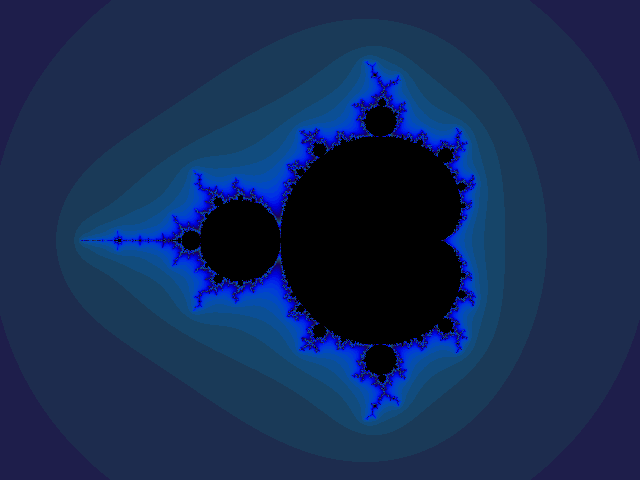

In [7]:
counts = mandelbrot(
    #render_size=(1920,1080), # HD
    render_size=(640,480),
    center=(-0.5,0),
    zoom=4,
    cycles=200
)  

img = render(counts)
print(img.size)
img

Mandlebrot rendering programs are both simple and infinitely complex at the same time. This view shows the entire Mandlebrot universe simultaneously, as a view completely zoomed out. However, if you zoom in on any non-black portion of the plot, you will find infinite hidden complexity. 

## Simple PyTorch Regression: MPG

This example shows how to encode the MPG dataset for regression and predict values. We will see if we can predict the miles per gallon (MPG) for a car based on the car's weight, cylinders, engine size, and other features.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable
from sklearn import preprocessing

# You will create a network class for every PyTorch neural network you create.
class Net(nn.Module):
    def __init__(self, in_count, out_count):
        super(Net, self).__init__()
        # We must define each of the layers.
        self.fc1 = nn.Linear(in_count, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, 1)

    def forward(self, x):
        # In the forward pass, we must calculate all of the layers we 
        # previously defined.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)





You define your neural network in the **Net** class above. The class name does not matter; however, it must subclass **nn.Module** and implement both the **__init__** and **forward** methods. The **__init__** method defines the layers of the neural network. In this case, we have a neural network with an input layer equal to the number of inputs you specify from the MPG dataset. The neural network connects these inputs to 50 neurons in the first hidden layer, which are connected to 25 neurons in the second layer. The output neuron count for a layer must always match the input count of the next layer.

The **forward** method links these layers together and also defines the transfer functions. For this book, we will generally always use the Relu activation function for hidden layers. The output layer will use no transfer function for a regression neural network like this MPG example. For classification, we use the logistic for binary classification (just two classes) or softmax for two or more classes.

For the neural network to perform correctly, everything must align. The **__init__** method must specify all layers with the same number of outputs as inputs for each connection. Finally, the **forward** method must link all the layers together, in the correct order.

We will begin by reading the MPG dataset. 

In [9]:
# Read the MPG dataset.
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Numpy to PyTorch
x = torch.Tensor(x).float()
y = torch.Tensor(y).float()



We use Pandas to load the CSV file, as previously demonstrated. We will save the names of the cars, though the car names do not help predict the MPG. Horsepower does have missing values, so we substitute the median value for any missing values. Next, we convert Pandas to NumPy, and Numpy to PyTorch. We select only the fields that we wish to use to predict. As previously discussed, we designed the Net class to detect the size of this data and add the appropriate count of input neurons.

We are ready to create the neural network, loss function, and optimizer class with the data loaded.

In [10]:
# Define the neural network
model = Net(x.shape[1],1)

# Define the loss function for regression
criterion = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



We create the neural network with one input equal to the number of columns in the x-input data. We specify one output neuron which will predict the MPG. Next, we define MSELoss as the error function, which is a common choice for regression. We will use the Adam optimizer with a learning rate of 0.01 to train the network. Adam is a common choice, and 0.01 is a good start for a learning rate. The learning rate should never be above 1.0. Too large of a learning rate will fail to learn the problem thoroughly, and too low of a learning rate will take a long time to train. We will see more advanced methods for choosing the learning rate, including schedules that change it throughout training.

With the objects created, we can now train the neural network.

In [11]:
# Train for 1000 epochs.
for epoch in range(1000):
    optimizer.zero_grad()
    out = model(x)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()
    
    # Display status every 100 epochs.
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss: {loss.item()}")

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([398])) that is different to the input size (torch.Size([398, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, loss: 7267.0810546875
Epoch 100, loss: 70.34253692626953
Epoch 200, loss: 64.74687194824219
Epoch 300, loss: 62.39861297607422
Epoch 400, loss: 61.902103424072266
Epoch 500, loss: 61.67346954345703
Epoch 600, loss: 61.63618469238281
Epoch 700, loss: 61.67856216430664
Epoch 800, loss: 61.624725341796875
Epoch 900, loss: 61.61912536621094


We now loop over 1,000 epochs and train the neural network; we define an epoch as one complete pass over the training set. We zero the gradients, so training from the previous epoch does not influence the current epoch. We present the entire training set to the model as one large batch. Later we will see more advanced ways to segment the data. We apply the loss function and use backpropagation to calculate the gradients to update the neural network weights.

## Introduction to Neural Network Hyperparameters

This network includes several hidden layers, with 50 and 25 neurons each. You might be wondering how the programmer chose these numbers. Selecting a hidden neuron structure is one of the most common questions about neural networks. Unfortunately, there is no right answer. These are hyperparameters. They are settings that can affect neural network performance, yet there are no clearly defined means of setting them.

In general, more hidden neurons mean more capability to fit complex problems. However, too many neurons can lead to overfitting and lengthy training times. Too few can lead to underfitting the problem and will sacrifice accuracy. Also, how many layers you have is another hyperparameter. In general, more layers allow the neural network to perform more of its feature engineering and data preprocessing. But this also comes at the expense of training times and the risk of overfitting. In general, you will see that neuron counts start larger near the input layer and tend to shrink towards the output layer in a triangular fashion. 

Some techniques use machine learning to optimize these values. These will be discussed in [Module 8.3](t81_558_class_08_3_pytorch_hyperparameters.ipynb).

## Regression Prediction

Next, we will perform actual predictions. The program assigns these predictions to the **pred** variable. These are all MPG predictions from the neural network. Notice that this is a 2D array? You can always see the dimensions of what PyTorch returns by printing out **pred.shape**. Neural networks can return multiple values, so the result is always an array. Here the neural network only returns one value per prediction (there are 398 cars, so 398 predictions). However, a 2D range is needed because the neural network has the potential of returning more than one value.  

In [12]:
pred = model(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: torch.Size([398, 1])
tensor([[21.4901],
        [22.1781],
        [21.7567],
        [21.9571],
        [21.4522],
        [22.6482],
        [22.9884],
        [22.7806],
        [23.2889],
        [22.2031]], grad_fn=<SliceBackward0>)


We would like to see how good these predictions are.  We know the correct MPG for each car so we can measure how close the neural network was.

In [13]:
from sklearn import metrics

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred.detach(),y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 7.673141956329346


The number printed above is the average number of predictions above or below the expected output. We can also print out the first ten cars with predictions and actual MPG.

In [14]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, " 
          + f"predicted MPG: {pred[i]}")

1. Car name: chevrolet chevelle malibu, MPG: 18.0, predicted MPG: tensor([21.4901], grad_fn=<SelectBackward0>)
2. Car name: buick skylark 320, MPG: 15.0, predicted MPG: tensor([22.1781], grad_fn=<SelectBackward0>)
3. Car name: plymouth satellite, MPG: 18.0, predicted MPG: tensor([21.7567], grad_fn=<SelectBackward0>)
4. Car name: amc rebel sst, MPG: 16.0, predicted MPG: tensor([21.9571], grad_fn=<SelectBackward0>)
5. Car name: ford torino, MPG: 17.0, predicted MPG: tensor([21.4522], grad_fn=<SelectBackward0>)
6. Car name: ford galaxie 500, MPG: 15.0, predicted MPG: tensor([22.6482], grad_fn=<SelectBackward0>)
7. Car name: chevrolet impala, MPG: 14.0, predicted MPG: tensor([22.9884], grad_fn=<SelectBackward0>)
8. Car name: plymouth fury iii, MPG: 14.0, predicted MPG: tensor([22.7806], grad_fn=<SelectBackward0>)
9. Car name: pontiac catalina, MPG: 14.0, predicted MPG: tensor([23.2889], grad_fn=<SelectBackward0>)
10. Car name: amc ambassador dpl, MPG: 15.0, predicted MPG: tensor([22.2031],

## Simple TensorFlow Classification: Iris

Classification is how a neural network attempts to classify the input into one or more classes.  The simplest way of evaluating a classification network is to track the percentage of training set items classified incorrectly.  We typically score human results in this manner.  For example, you might have taken multiple-choice exams in school in which you had to shade in a bubble for choices A, B, C, or D.  If you chose the wrong letter on a 10-question exam, you would earn a 90%.  In the same way, we can grade computers; however, most classification algorithms do not merely choose A, B, C, or D.  Computers typically report a classification as their percent confidence in each class.  Figure 3.EXAM shows how a computer and a human might respond to question number 1 on an exam.

**Figure 3.EXAM: Classification Neural Network Output**
![Classification Neural Network Output](images/class-multi-choice.png "Classification Neural Network Output")

As you can see, the human test taker marked the first question as "B." However, the computer test taker had an 80% (0.8) confidence in "B" and was also somewhat sure with 10% (0.1) on "A." The computer then distributed the remaining points to the other two.  In the simplest sense, the machine would get 80% of the score for this question if the correct answer were "B." The computer would get only 5% (0.05) of the points if the correct answer were "D." 

We previously saw how to train a neural network to predict the MPG of a card. Based on four measurements, we will now see how to predict a class, such as the type of iris flower. The code to classify iris flowers is similar to MPG; however, there are several important differences:

* The output neuron count matches the number of classes (in the case of Iris, 3).
* The **Softmax** transfer function is utilized by the output layer.
* The loss function is **CrossEntropyLoss**.
 



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable
from sklearn import preprocessing


class Net(nn.Module):
    def __init__(self, in_count, out_count):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_count, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, out_count)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.softmax(self.fc3(x))

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

le = preprocessing.LabelEncoder()

x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
y = le.fit_transform(df['species'])
species = le.classes_

x = torch.Tensor(x).float()
y = torch.Tensor(y).long()

model = Net(x.shape[1],len(species))

criterion = nn.CrossEntropyLoss()# cross entropy loss

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
    optimizer.zero_grad()
    out = model(x)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss: {loss.item()}")

Epoch 0, loss: 1.1018542051315308
Epoch 100, loss: 0.5703378915786743
Epoch 200, loss: 0.570610761642456
Epoch 300, loss: 0.5682231783866882
Epoch 400, loss: 0.5666402578353882
Epoch 500, loss: 0.5664065480232239
Epoch 600, loss: 0.5672382712364197
Epoch 700, loss: 0.565004289150238
Epoch 800, loss: 0.5638324022293091
Epoch 900, loss: 0.5665655732154846


In [16]:
# Print out number of species found:

print(species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Now that you have a neural network trained, we would like to be able to use it. The following code makes use of our neural network. Exactly like before, we will generate predictions. Notice that three values come back for each of the 150 iris flowers. There were three types of iris (Iris-setosa, Iris-versicolor, and Iris-virginica).  

In [17]:
pred = model(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: torch.Size([150, 3])
tensor([[1.0000e+00, 2.3368e-07, 0.0000e+00],
        [1.0000e+00, 1.2691e-06, 0.0000e+00],
        [1.0000e+00, 7.8415e-07, 0.0000e+00],
        [1.0000e+00, 2.9112e-06, 5.6052e-45],
        [1.0000e+00, 2.2669e-07, 0.0000e+00],
        [1.0000e+00, 2.9579e-07, 0.0000e+00],
        [1.0000e+00, 1.2391e-06, 0.0000e+00],
        [1.0000e+00, 5.6966e-07, 0.0000e+00],
        [1.0000e+00, 4.8976e-06, 2.2141e-43],
        [1.0000e+00, 1.0951e-06, 0.0000e+00]], grad_fn=<SliceBackward0>)


If you would like to turn of scientific notation, the following line can be used:

In [18]:
np.set_printoptions(suppress=True)

Now we see these values rounded up.

In [19]:
print(y[0:10])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Usually, the program considers the column with the highest prediction to be the prediction of the neural network.  It is easy to convert the predictions to the expected iris species.  The argmax function finds the index of the maximum prediction for each row.

In [20]:
_, predict_classes = torch.max(pred, 1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {y}")

Predictions: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])
Expected: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Of course, it is straightforward to turn these indexes back into iris species. We use the species list that we created earlier.

In [21]:
print(species[predict_classes[1:10]])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


Accuracy might be a more easily understood error metric.  It is essentially a test score.  For all of the iris predictions, what percent were correct?  The downside is it does not consider how confident the neural network was in each prediction.

In [22]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(y,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.9866666666666667


The code below performs two ad hoc predictions.  The first prediction is a single iris flower, and the second predicts two iris flowers.  Notice that the **argmax** in the second prediction requires **axis=1**?  Since we have a 2D array now, we must specify which axis to take the **argmax** over.  The value **axis=1** specifies we want the max column index for each row.

In [23]:
sample_flower = torch.Tensor( [[5.0,3.0,4.0,2.0]])
pred = model(sample_flower)
print(pred)
_, predict_classes = torch.max(pred, 1)
print(f"Predict that {sample_flower} is: {species[predict_classes]}")

tensor([[3.4904e-05, 9.3151e-01, 6.8450e-02]], grad_fn=<SoftmaxBackward0>)
Predict that tensor([[5., 3., 4., 2.]]) is: Iris-versicolor


You can also predict two sample flowers.

In [24]:
sample_flower = torch.Tensor( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]])
pred = model(sample_flower)
print(pred)
_, predict_classes = torch.max(pred, 1)
print(f"Predict that these two flowers {sample_flower} ")
print(f"are: {species[predict_classes]}")

tensor([[3.4904e-05, 9.3151e-01, 6.8450e-02],
        [1.0000e+00, 1.9912e-06, 0.0000e+00]], grad_fn=<SoftmaxBackward0>)
Predict that these two flowers tensor([[5.0000, 3.0000, 4.0000, 2.0000],
        [5.2000, 3.5000, 1.5000, 0.8000]]) 
are: ['Iris-versicolor' 'Iris-setosa']
